# LEAD SCORING CASE STUDY

 - Our Goals of the Case Study:
   - To build a Logistic Regression model to assign a Lead Score between 0 and 100 to each of the leads which can be used by the      company to traget potential Leads.
   - To Adjust to if the company's requirement changes in the future so you need to handle these as well

## 1. Importing Libraries

In [1]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading

### 2.1 Loading Dataset

In [3]:
# Reading the datasets using csv
data = pd.read_csv('Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


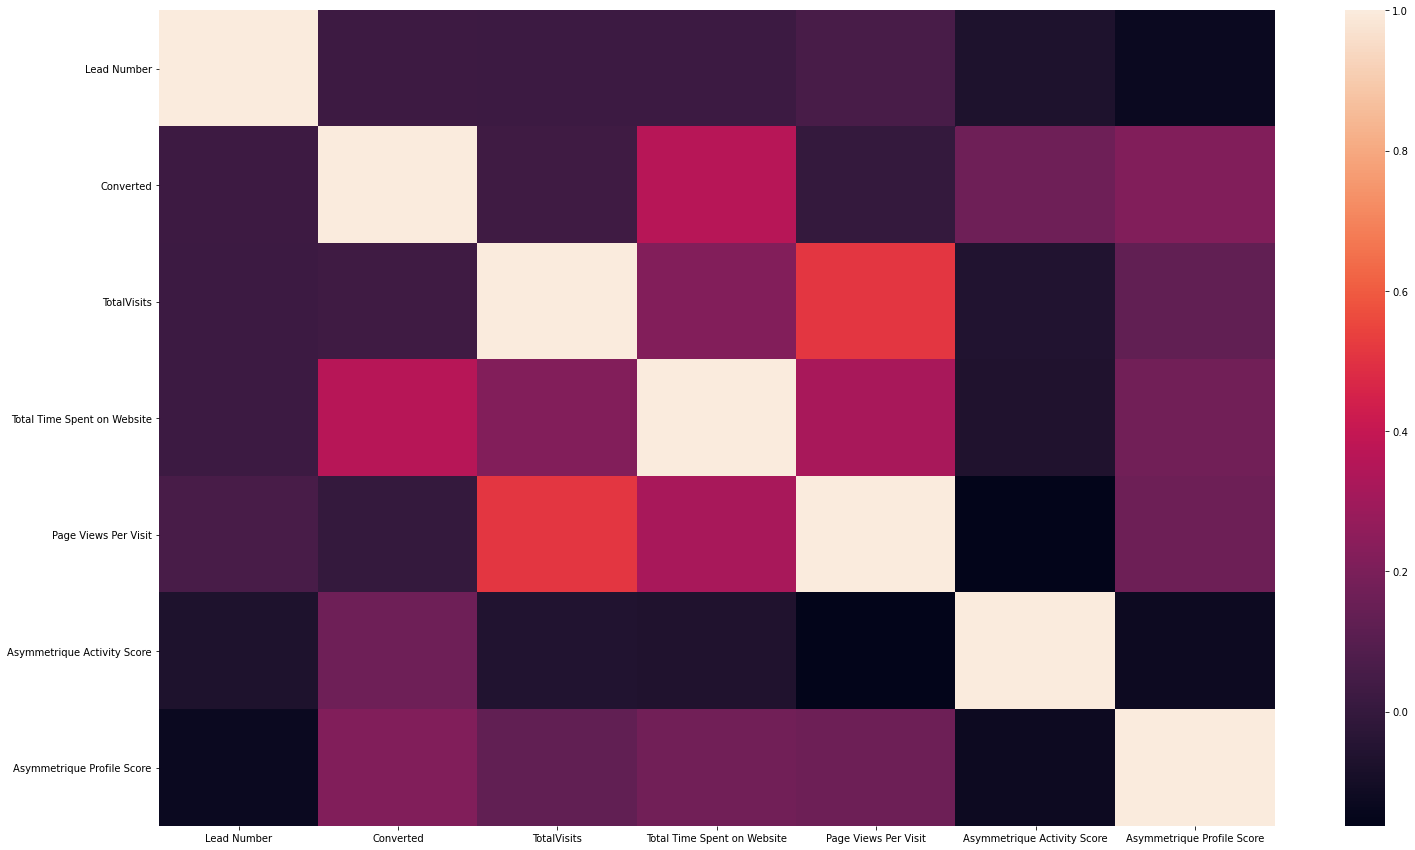

In [4]:
# We will plot correlation for clear understanding
plt.figure(figsize=[25,15])
sns.heatmap(data.corr())
plt.show()

We have plotted correlation heatmap for our data set 
- so we can see that Page Views Per visit and lead number are highly correlated. 
- and asymmetrique activity score is also highly correlated

### 2.1 Data inspection

In [5]:
# Checking the shape of Dataframe
data.shape

(9240, 37)

In [6]:
# Checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Checking the statistical details 
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 2.3 Data Cleaning

In [8]:
# Checking Categorical and Numerical values in data.
categorical_col = data.select_dtypes(exclude = ['number']).columns.values
numerical_col = data.select_dtypes(include = ['number']).columns.values
print('CATEGORICAL FEATURES : \n {} \n\n'. format(categorical_col))
print('NUMERICAL FEATURES : \n {} \n\n'. format(numerical_col))

CATEGORICAL FEATURES : 
 ['Prospect ID' 'Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call'
 'Last Activity' 'Country' 'Specialization'
 'How did you hear about X Education' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses' 'Tags' 'Lead Quality'
 'Update me on Supply Chain Content' 'Get updates on DM Content'
 'Lead Profile' 'City' 'Asymmetrique Activity Index'
 'Asymmetrique Profile Index' 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview' 'Last Notable Activity'] 


NUMERICAL FEATURES : 
 ['Lead Number' 'Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit' 'Asymmetrique Activity Score'
 'Asymmetrique Profile Score'] 




In [9]:
# Converting 'Select' values to NaN
data = data.replace('Select', np.nan)

In [10]:
# checking the columns for null values
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
# Checking null values in percentage
round(data.isnull().sum()/len(data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

- We found more than 40% missing values so it is better to drop those columns.

In [12]:
# WE will drop some columns having more than 40% missing values
data = data.drop(columns=['How did you hear about X Education','Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index'
                         , 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

In [13]:
# Verifying again data after dropping columns after 40%
round(data.isnull().sum()/len(data.index), 2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

- 1. Specialization

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64


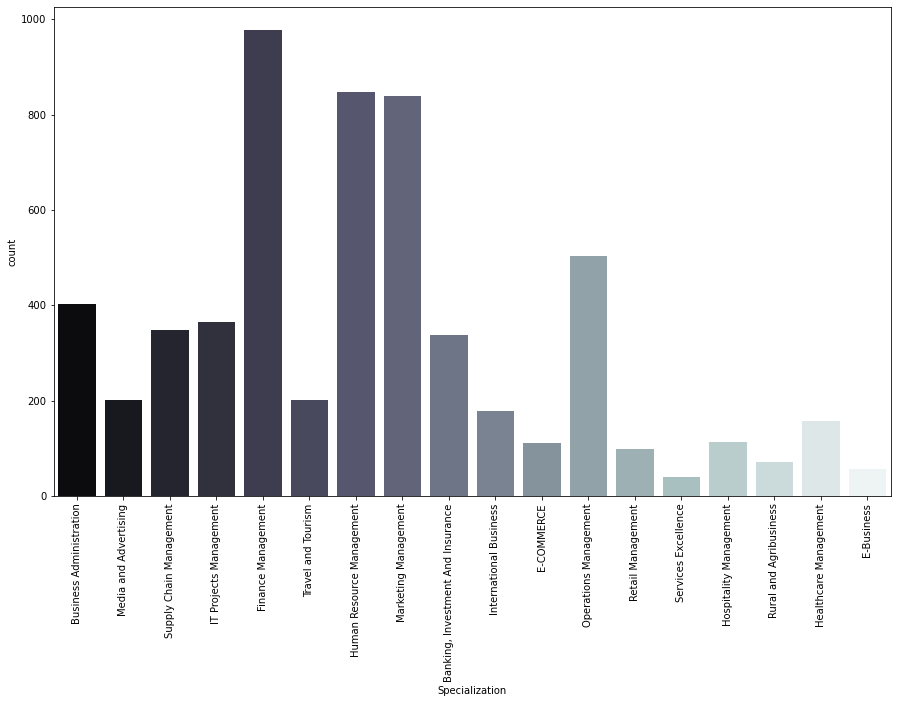

In [14]:
# So after dropping variables we will plot Graphs for remaining values 
plt.figure(figsize=[15,9])
sns.countplot(data['Specialization'], palette='bone')
plt.xticks(rotation=90)

print(data['Specialization'].value_counts())

In [15]:
# So finance management has highest missing values , now we will impute missing data with Others
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

- 2. 'What is your current occupation'

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


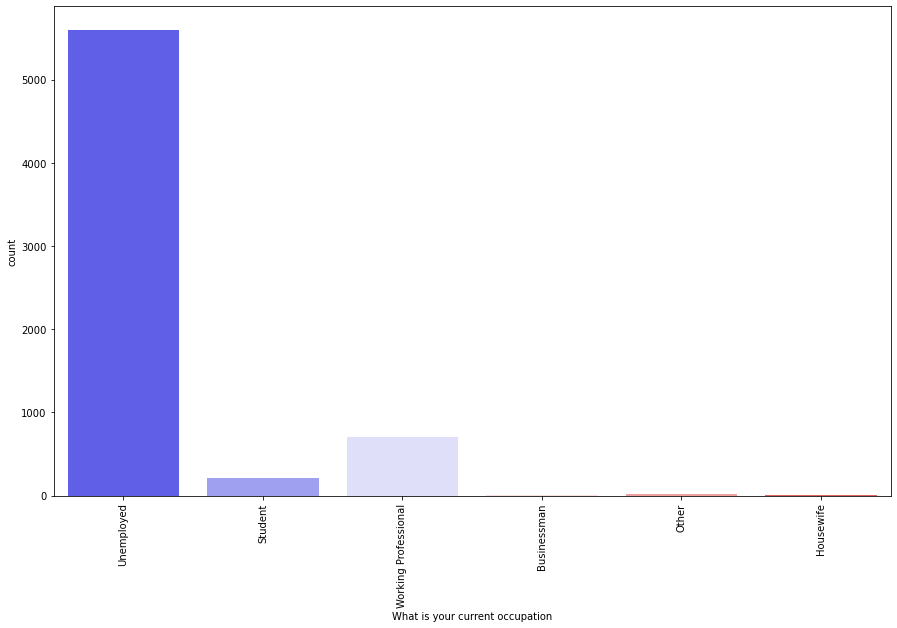

In [16]:
# Plotting graph for 'What is your current occupation'
plt.figure(figsize=[15,9])
sns.countplot(data['What is your current occupation'], palette='bwr')
plt.xticks(rotation=90)

print(data['What is your current occupation'].value_counts())

In [17]:
# Imputing missing data in the column 'What is your current occupation' with 'employed'.
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

 - 3. 'What matters most to you in choosing a course

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

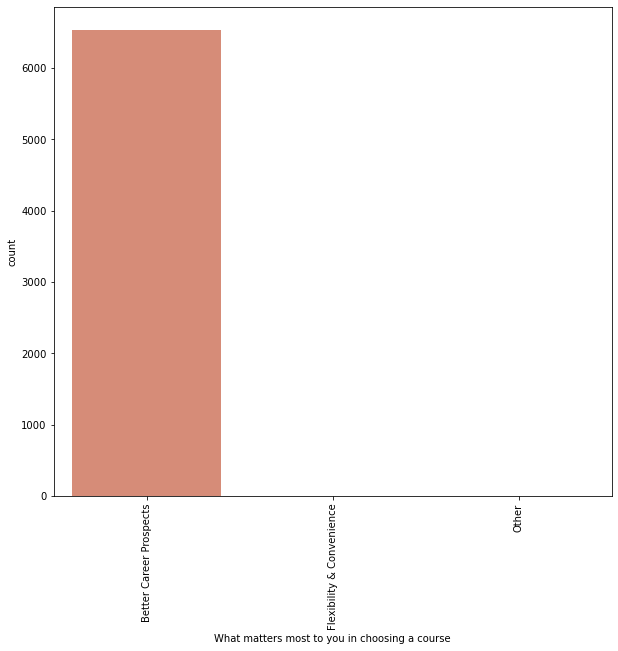

In [18]:
# Plotting graph and checking value counts 
plt.figure(figsize=[10,9])
sns.countplot(data['What matters most to you in choosing a course'], palette='RdGy')
plt.xticks(rotation=90)

round(data['What matters most to you in choosing a course'].value_counts(normalize=True), 2)*100

In [19]:
# dropping 'What matters most to you in choosing a course' because it has skewed column
data = data.drop('What matters most to you in choosing a course', axis=1)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


 - 4. Tags Column
 

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

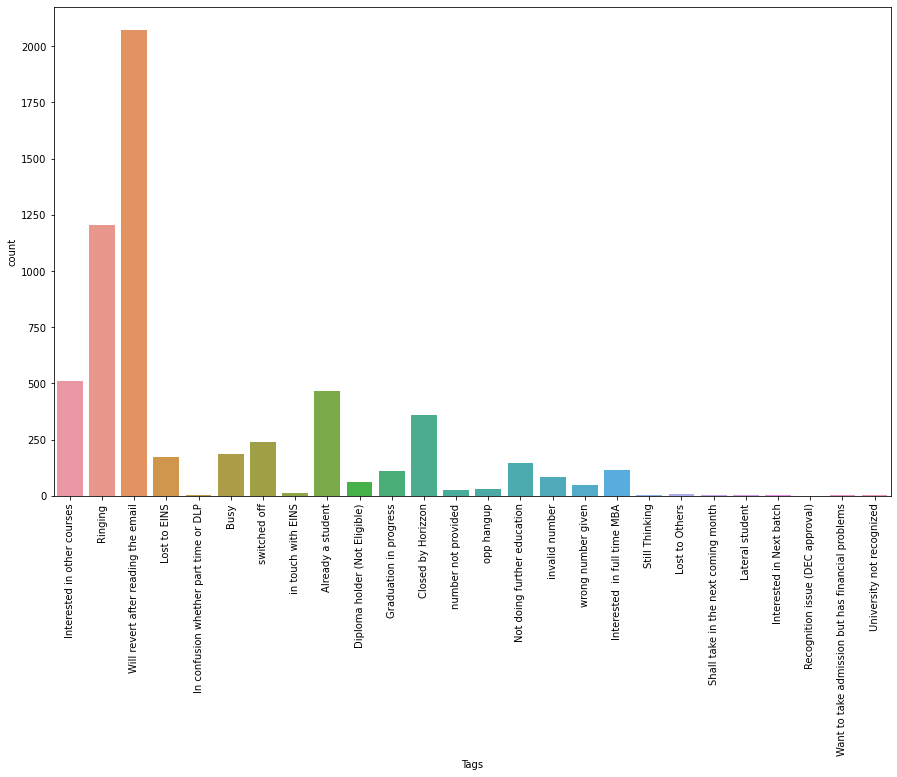

In [20]:
# Checking with Tag and using value counts
plt.figure(figsize=[15,9])
sns.countplot(data['Tags'])
plt.xticks(rotation=90)

print(data['Tags'].value_counts())

-  we can notice here that 'Will revert after reading the email' has most values, so we will impute in this column

In [21]:
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

 - 5. Country

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Nigeria                    4
Canada                     4
Germany                    4
Sweden                     3
Uganda                     2
Asia/Pacific Region        2
Belgium                    2
Bangladesh                 2
China                      2
Italy                      2
Ghana                      2
Philippines                2
Netherlands                2
Sri Lanka                  1
Denmark                    1
Kenya                      1
Malaysia                   1
Switzerland                1
Russia                     1
Indonesia     

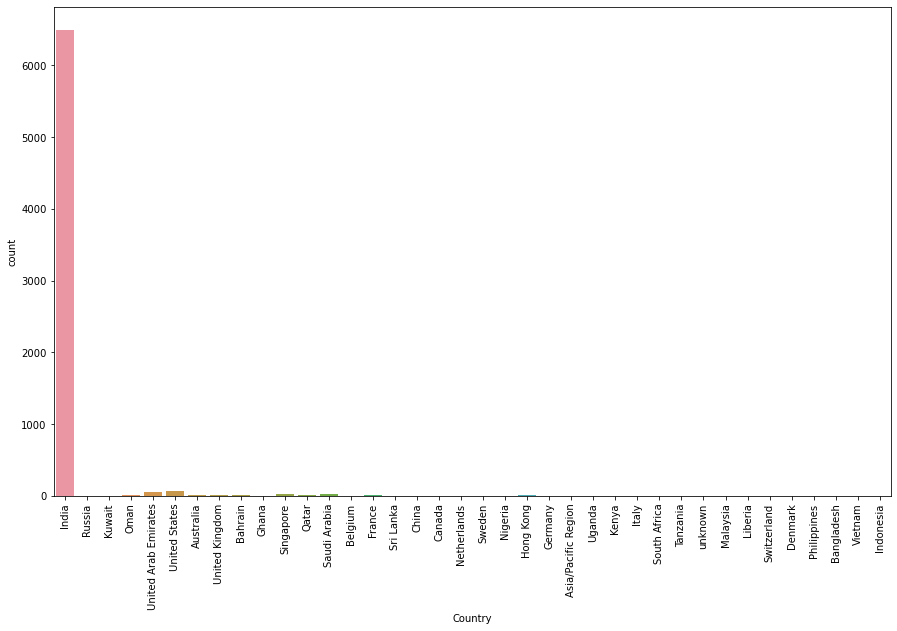

In [22]:
# Checking with Country and using value counts
plt.figure(figsize=[15,9])
sns.countplot(data['Country'])
plt.xticks(rotation=90)

data['Country'].value_counts()

In [23]:
# So India has highest missing values , now we will impute missing data with 'India'
data['Country'] = data['Country'].replace(np.nan, 'India')

 - 6. City

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

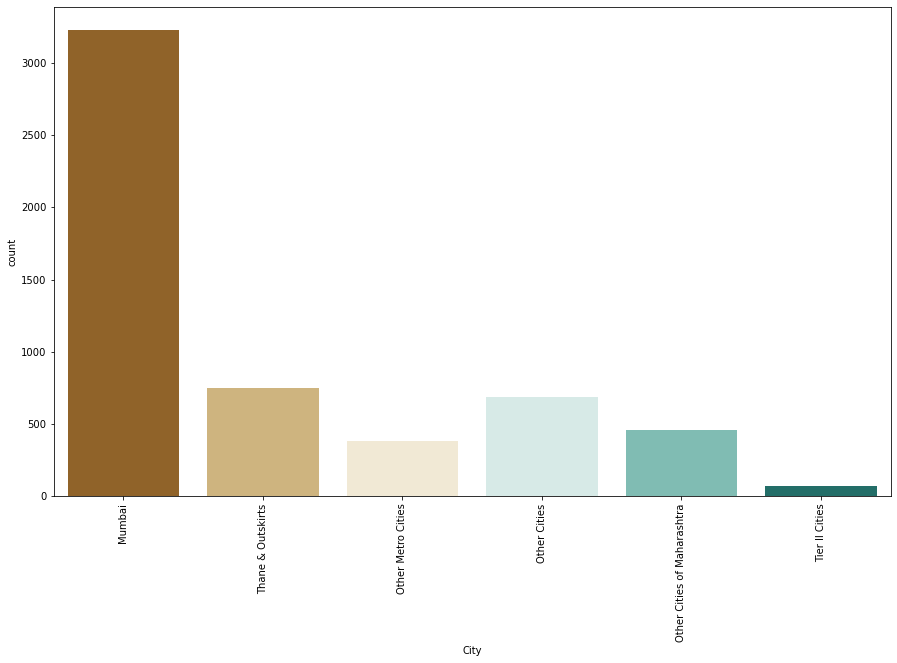

In [24]:
# 
plt.figure(figsize=[15,9])
sns.countplot(data['City'], palette='BrBG')
plt.xticks(rotation=90)

data['City'].value_counts()

In [25]:
# We notice here that mumbai is the highest. WE will impute missing data in the 'City' with 'Mumbai'
data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [26]:
# We have imputed that missing  values and now Checking columns
round(data.isnull().sum()/len(data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [27]:
# We will Check unique values in our data
for col in data.columns:
    print(col, data[col].nunique())

Prospect ID 9240
Lead Number 9240
Lead Origin 5
Lead Source 21
Do Not Email 2
Do Not Call 2
Converted 2
TotalVisits 41
Total Time Spent on Website 1731
Page Views Per Visit 114
Last Activity 17
Country 38
Specialization 19
What is your current occupation 6
Search 2
Magazine 1
Newspaper Article 2
X Education Forums 2
Newspaper 2
Digital Advertisement 2
Through Recommendations 2
Receive More Updates About Our Courses 1
Tags 26
Update me on Supply Chain Content 1
Get updates on DM Content 1
City 6
I agree to pay the amount through cheque 1
A free copy of Mastering The Interview 2
Last Notable Activity 16


 - So we can notice that ProspectID and Lead Number are the same columns so it no use, hence dropping Lead Number and some other columns.

In [28]:
# Dropping ProspectId and some other columns for clear understanding
data = data.drop(['Lead Number', 'Tags', 'Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [29]:
# So after dropping various columns we will verify.
data.shape

(9240, 14)

In [30]:
# Checking the datatypes after dropping various columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9240 non-null   object 
 1   Lead Origin                      9240 non-null   object 
 2   Lead Source                      9204 non-null   object 
 3   Do Not Email                     9240 non-null   object 
 4   Do Not Call                      9240 non-null   object 
 5   Converted                        9240 non-null   int64  
 6   TotalVisits                      9103 non-null   float64
 7   Total Time Spent on Website      9240 non-null   int64  
 8   Page Views Per Visit             9103 non-null   float64
 9   Last Activity                    9137 non-null   object 
 10  Specialization                   9240 non-null   object 
 11  What is your current occupation  9240 non-null   object 
 12  City                

## 3. Data Preparation

### 1) For data preparation we will map some binary variables (Yes/No) to 1/0

In [31]:
# Before that we will check the data again
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


In [32]:
# Checking categorical variables
categorical_col = data.select_dtypes(exclude = ['number']).columns.values
print('CATEGORICAL FEATURES : \n {} \n\n'. format(categorical_col))

CATEGORICAL FEATURES : 
 ['Prospect ID' 'Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call'
 'Last Activity' 'Specialization' 'What is your current occupation' 'City'
 'Last Notable Activity'] 




 - All these variables are Categorical Variables

In [33]:
# Converting some binary variables to (Yes/No) to 0/1

varlist = ['Do Not Email', 'Do Not Call']

# Defining the map functions
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying binary function to varlist
data[varlist] = data[varlist].apply(binary_map)

In [34]:
# Checking once again after converting binary
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


### 2) Creating Dummy Variables for the Categorical Features

In [35]:
# Now we will create a dummy variables for the categorical variables and we will drop the first one
dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
# After Converting dummy variables we will concatanate dummy to data
data = pd.concat([data, dummy], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [37]:
# We will drop those columns which we created for dummy variables
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)
data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
# we have dropped 7 columns after getting dummies

#### Outlier Treatment

<AxesSubplot:xlabel='Total Time Spent on Website'>

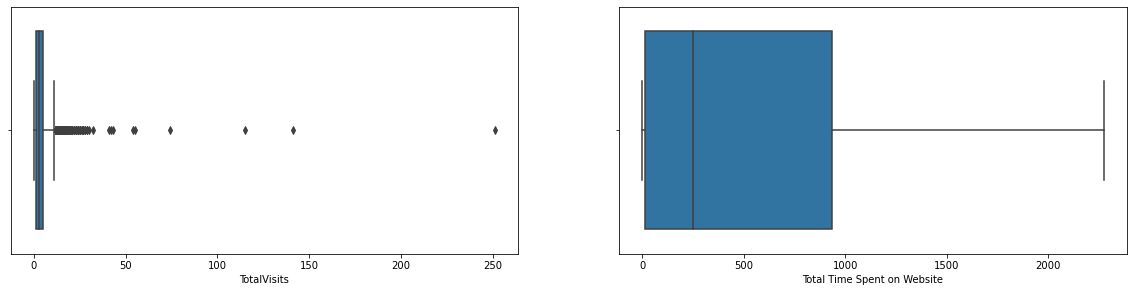

In [39]:
# Plotting boxplot for numerical Variables
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
sns.boxplot(data['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(data['Total Time Spent on Website'])

In [40]:
# We will remove some outliers using the IQR method
Q1 = data['TotalVisits'].quantile(0.25)
Q3 = data['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
data = data.loc[(data['TotalVisits'] >= Q1 - 1.5*IQR) & (data['TotalVisits'] <= Q3 + 1.5*IQR)]

Q1 = data['Total Time Spent on Website'].quantile(0.25)
Q3 = data['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
data = data.loc[(data['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (data['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]

<AxesSubplot:xlabel='Total Time Spent on Website'>

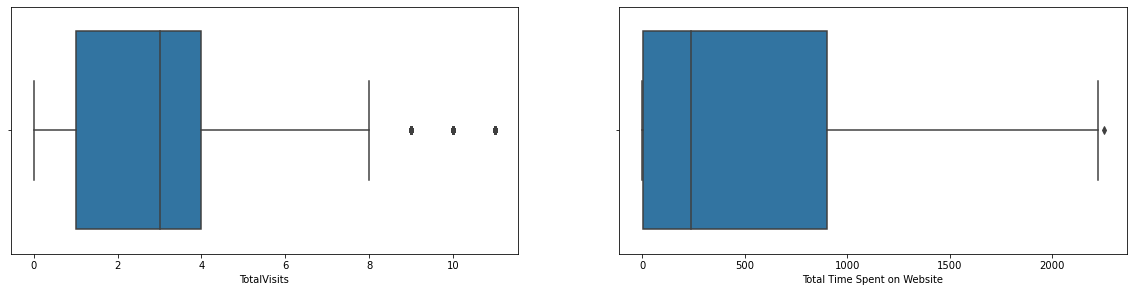

In [41]:
# We will verify outliers again by plotting same boxplot
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
sns.boxplot(data['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(data['Total Time Spent on Website'])



In [42]:
# Actually 'TotalVisits' and 'Page Views Per Visit' are same .
# so that is why we plot boxplot for 'TotalVisits' and 'Total Time Spent on Website'.

### 3) Splitting the Data into Train and Test set

In [43]:
# Importing sklearn to train test split
from sklearn.model_selection import train_test_split

# Putting features variable to x
X = data.drop(['Prospect ID', 'Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


 ##### -  We added Converted Variable because it is our targeted Variable.

In [44]:
# Putting target varibale to y
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [45]:
# We will now Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=100 )

### 4) Scaling the Features

In [46]:
# Checking standard Scaler with variable X on following columns.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5023,1,0,0.386156,-0.345058,0.873334,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5658,0,0,-1.162976,-0.877843,-1.165691,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8617,0,0,-0.388410,1.390611,-0.146178,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
52,0,0,1.160721,-0.156478,-0.146178,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1927,0,0,-1.162976,-0.877843,-1.165691,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


 - So we can See 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'. have been standardScaler

In [47]:
# Checking the Converted Rate
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.8494623655914

##### We have almost 37.84% Converted rate

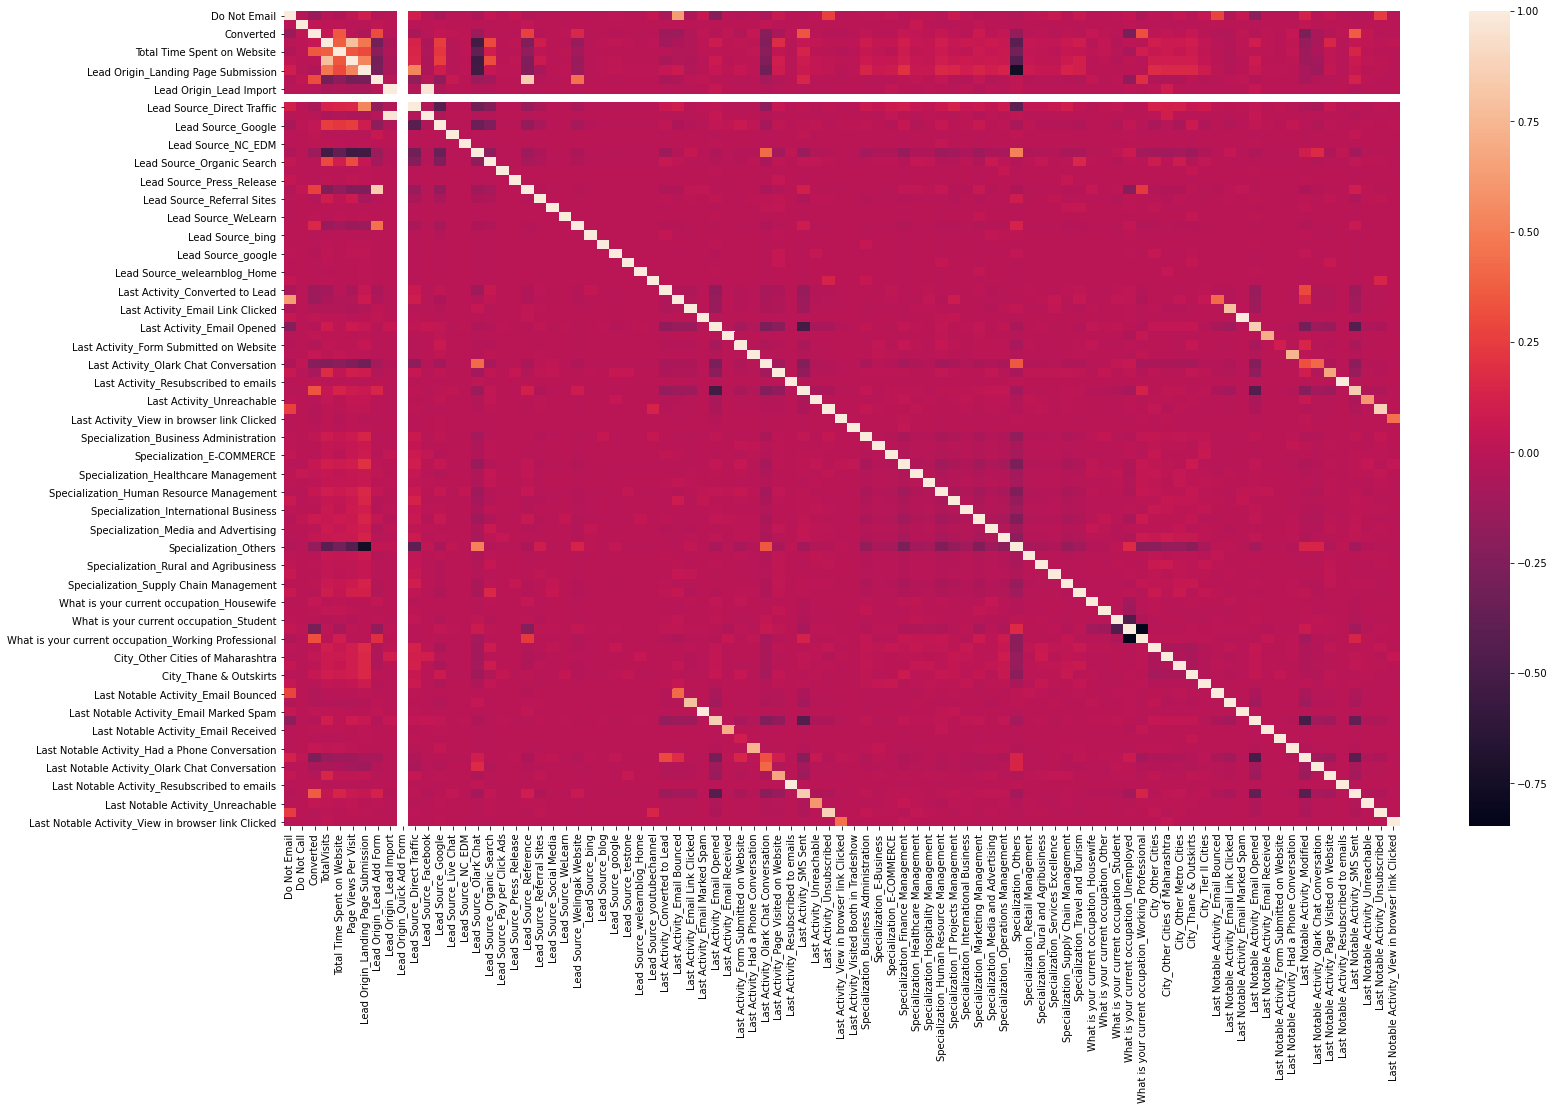

In [48]:
# We will plot correlation.
plt.figure(figsize=[25,15])
sns.heatmap(data.corr())
plt.show()

## 4. Model Building

In [49]:
# Importing sklearn.linear model for Linear Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [50]:
# Importing sklearn feature selection Using RFE for 20 variables 
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)                              # running RFE with 20 variables
rfe = rfe.fit(X_train, y_train)

In [51]:
# Running RFE with support
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
        True, False,  True, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False])

In [52]:
# We will check rfe.support with our 20 variables and will check their support and ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 26),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 62),
 ('Lead Origin_Quick Add Form', False, 68),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 49),
 ('Lead Source_NC_EDM', False, 25),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 55),
 ('Lead Source_Reference', False, 47),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 69),
 ('Lead Source_WeLearn', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 60),
 ('Lead Source_blog', False, 16),
 ('Lead Source_google',

In [53]:
# Checking columns that all selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

##### We have used RFE support and RFE ranking to all the columns and now its time to build Model

### Assessing the Model with StatsModels

## Model 1

In [54]:
# Importing statsmodel for Building model
import statsmodels.api as sm

In [55]:
# Running our first Model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6184
Model:                            GLM   Df Residuals:                     6163
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2549.3
Date:                Tue, 07 Sep 2021   Deviance:                       5098.6
Time:                        16:05:32   Pearson chi2:                 6.43e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8088      0.139      5.831      0.000       0.537       1.081
Do Not Email                                            -1.0906      0.184     -5.935      0.000      -1.451      -0.730
Total Time Spent on Website                              1.0833      0.041     26.635      0.000       1.004       1.163
Lead Origin_Landing Page Submission                     -0.9797      0.139     -7.041      0.000      -1.252      -0.707
Lead Origin_Lead Add Form                                2.1760      0.230      9.448      0.000       1.725       2.627
Lead Source_Direct Traffic                              -1.3349      0.150     -8.900      0.000      -1.629      -1.041
Lead Source_Google                                      -1.0560      0.127     -8.312      0.000      -1.305      -0.807
Lead Source_Organic Search                              -1.2330      0.149     -8.290      0.000      -1.525      -0.942
Lead Source_Referral Sites                              -1.4940      0.359     -4.161      0.000      -2.198      -0.790
Lead Source_Welingak Website                             2.3928      0.755      3.171      0.002       0.914       3.872
Last Activity_Converted to Lead                         -0.9317      0.203     -4.592      0.000      -1.329      -0.534
Last Activity_Email Bounced                             -0.9593      0.393     -2.439      0.015      -1.730      -0.189
Last Activity_Form Submitted on Website                 -0.9367      0.338     -2.769      0.006      -1.600      -0.274
Last Activity_Had a Phone Conversation                   1.8726      1.048      1.787      0.074      -0.181       3.927
Last Activity_Olark Chat Conversation                   -1.5310      0.168     -9.120      0.000      -1.860      -1.202
Specialization_Others                                   -1.1465      0.128     -8.986      0.000      -1.397      -0.896
What is your current occupation_Housewife               23.2495   1.61e+04      0.001      0.999   -3.15e+04    3.16e+04
What is your current occupation_Working Professional     2.6677      0.197     13.513      0.000       2.281       3.055
Last Notable Activity_Had a Phone Conversation           1.1055      1.545      0.715      0.474      -1.923       4.134
Last Notable Activity_SMS Sent                           1.5310      0.082     18.651      0.000       1.370       1.692
Last Notable Activity_Unreachable                        1.0974      0.527      2.080      0.037       0.064       2.131
========================================================================================================================
"""

In [56]:
# Checking for VIF values

In [57]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a adataframe that will contain the names of all feature variables
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
2,Lead Origin_Landing Page Submission,6.07
4,Lead Source_Direct Traffic,4.24
5,Lead Source_Google,3.15
12,Last Activity_Had a Phone Conversation,2.61
17,Last Notable Activity_Had a Phone Conversation,2.61
14,Specialization_Others,2.35
6,Lead Source_Organic Search,1.82
0,Do Not Email,1.81
10,Last Activity_Email Bounced,1.74
3,Lead Origin_Lead Add Form,1.50


## Model 2 

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6184
Model:                            GLM   Df Residuals:                     6163
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2549.3
Date:                Tue, 07 Sep 2021   Deviance:                       5098.6
Time:                        16:05:32   Pearson chi2:                 6.43e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8088      0.139      5.831      0.000       0.537       1.081
Do Not Email                                            -1.0906      0.184     -5.935      0.000      -1.451      -0.730
Total Time Spent on Website                              1.0833      0.041     26.635      0.000       1.004       1.163
Lead Origin_Landing Page Submission                     -0.9797      0.139     -7.041      0.000      -1.252      -0.707
Lead Origin_Lead Add Form                                2.1760      0.230      9.448      0.000       1.725       2.627
Lead Source_Direct Traffic                              -1.3349      0.150     -8.900      0.000      -1.629      -1.041
Lead Source_Google                                      -1.0560      0.127     -8.312      0.000      -1.305      -0.807
Lead Source_Organic Search                              -1.2330      0.149     -8.290      0.000      -1.525      -0.942
Lead Source_Referral Sites                              -1.4940      0.359     -4.161      0.000      -2.198      -0.790
Lead Source_Welingak Website                             2.3928      0.755      3.171      0.002       0.914       3.872
Last Activity_Converted to Lead                         -0.9317      0.203     -4.592      0.000      -1.329      -0.534
Last Activity_Email Bounced                             -0.9593      0.393     -2.439      0.015      -1.730      -0.189
Last Activity_Form Submitted on Website                 -0.9367      0.338     -2.769      0.006      -1.600      -0.274
Last Activity_Had a Phone Conversation                   1.8726      1.048      1.787      0.074      -0.181       3.927
Last Activity_Olark Chat Conversation                   -1.5310      0.168     -9.120      0.000      -1.860      -1.202
Specialization_Others                                   -1.1465      0.128     -8.986      0.000      -1.397      -0.896
What is your current occupation_Housewife               23.2495   1.61e+04      0.001      0.999   -3.15e+04    3.16e+04
What is your current occupation_Working Professional     2.6677      0.197     13.513      0.000       2.281       3.055
Last Notable Activity_Had a Phone Conversation           1.1055      1.545      0.715      0.474      -1.923       4.134
Last Notable Activity_SMS Sent                           1.5310      0.082     18.651      0.000       1.370       1.692
Last Notable Activity_Unreachable                        1.0974      0.527      2.080      0.037       0.064       2.131
========================================================================================================================
"""

In [59]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a adataframe that will contain the names of all feature variables
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
2,Lead Origin_Landing Page Submission,6.07
4,Lead Source_Direct Traffic,4.24
5,Lead Source_Google,3.15
12,Last Activity_Had a Phone Conversation,2.61
17,Last Notable Activity_Had a Phone Conversation,2.61
14,Specialization_Others,2.35
6,Lead Source_Organic Search,1.82
0,Do Not Email,1.81
10,Last Activity_Email Bounced,1.74
3,Lead Origin_Lead Add Form,1.50


 - We can observe here that Pvalues of 'Last Notable Activity_Had a Phone Conversation' is high and so we will drop

In [60]:
col = col.drop('Last Notable Activity_Had a Phone Conversation')

## Model 3

In [61]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6184
Model:                            GLM   Df Residuals:                     6164
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2549.6
Date:                Tue, 07 Sep 2021   Deviance:                       5099.1
Time:                        16:05:32   Pearson chi2:                 6.43e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8093      0.139      5.834      0.000       0.537       1.081
Do Not Email                                            -1.0942      0.184     -5.956      0.000      -1.454      -0.734
Total Time Spent on Website                              1.0830      0.041     26.630      0.000       1.003       1.163
Lead Origin_Landing Page Submission                     -0.9777      0.139     -7.029      0.000      -1.250      -0.705
Lead Origin_Lead Add Form                                2.1762      0.230      9.448      0.000       1.725       2.628
Lead Source_Direct Traffic                              -1.3376      0.150     -8.920      0.000      -1.632      -1.044
Lead Source_Google                                      -1.0560      0.127     -8.311      0.000      -1.305      -0.807
Lead Source_Organic Search                              -1.2362      0.149     -8.312      0.000      -1.528      -0.945
Lead Source_Referral Sites                              -1.4987      0.360     -4.164      0.000      -2.204      -0.793
Lead Source_Welingak Website                             2.3932      0.755      3.171      0.002       0.914       3.872
Last Activity_Converted to Lead                         -0.9311      0.203     -4.589      0.000      -1.329      -0.533
Last Activity_Email Bounced                             -0.9557      0.393     -2.430      0.015      -1.726      -0.185
Last Activity_Form Submitted on Website                 -0.9374      0.338     -2.772      0.006      -1.600      -0.275
Last Activity_Had a Phone Conversation                   2.4307      0.739      3.289      0.001       0.982       3.879
Last Activity_Olark Chat Conversation                   -1.5307      0.168     -9.118      0.000      -1.860      -1.202
Specialization_Others                                   -1.1474      0.128     -8.993      0.000      -1.397      -0.897
What is your current occupation_Housewife               23.2495   1.61e+04      0.001      0.999   -3.15e+04    3.16e+04
What is your current occupation_Working Professional     2.6676      0.197     13.512      0.000       2.281       3.055
Last Notable Activity_SMS Sent                           1.5312      0.082     18.653      0.000       1.370       1.692
Last Notable Activity_Unreachable                        1.0976      0.528      2.081      0.037       0.064       2.131
========================================================================================================================
"""

In [62]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a adataframe that will contain the names of all feature variables
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
2,Lead Origin_Landing Page Submission,6.06
4,Lead Source_Direct Traffic,4.24
5,Lead Source_Google,3.15
14,Specialization_Others,2.35
6,Lead Source_Organic Search,1.82
0,Do Not Email,1.81
10,Last Activity_Email Bounced,1.74
3,Lead Origin_Lead Add Form,1.50
17,Last Notable Activity_SMS Sent,1.47
13,Last Activity_Olark Chat Conversation,1.35


 - So we can notice here that 'Last Notable Activity_Unreachable' has large Pvalues so we will drop them


In [63]:
col = col.drop('Last Notable Activity_Unreachable')

### Model 4

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6184
Model:                            GLM   Df Residuals:                     6165
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.7
Date:                Tue, 07 Sep 2021   Deviance:                       5103.5
Time:                        16:05:33   Pearson chi2:                 6.44e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8193      0.139      5.909      0.000       0.548       1.091
Do Not Email                                            -1.0977      0.184     -5.977      0.000      -1.458      -0.738
Total Time Spent on Website                              1.0821      0.041     26.635      0.000       1.002       1.162
Lead Origin_Landing Page Submission                     -0.9846      0.139     -7.081      0.000      -1.257      -0.712
Lead Origin_Lead Add Form                                2.1778      0.230      9.459      0.000       1.727       2.629
Lead Source_Direct Traffic                              -1.3358      0.150     -8.912      0.000      -1.630      -1.042
Lead Source_Google                                      -1.0505      0.127     -8.273      0.000      -1.299      -0.802
Lead Source_Organic Search                              -1.2290      0.149     -8.272      0.000      -1.520      -0.938
Lead Source_Referral Sites                              -1.4707      0.359     -4.102      0.000      -2.173      -0.768
Lead Source_Welingak Website                             2.3889      0.755      3.166      0.002       0.910       3.868
Last Activity_Converted to Lead                         -0.9399      0.203     -4.634      0.000      -1.337      -0.542
Last Activity_Email Bounced                             -0.9595      0.393     -2.440      0.015      -1.730      -0.189
Last Activity_Form Submitted on Website                 -0.9471      0.338     -2.800      0.005      -1.610      -0.284
Last Activity_Had a Phone Conversation                   2.4214      0.739      3.276      0.001       0.973       3.870
Last Activity_Olark Chat Conversation                   -1.5383      0.168     -9.163      0.000      -1.867      -1.209
Specialization_Others                                   -1.1531      0.128     -9.038      0.000      -1.403      -0.903
What is your current occupation_Housewife               23.2411   1.61e+04      0.001      0.999   -3.15e+04    3.15e+04
What is your current occupation_Working Professional     2.6731      0.197     13.546      0.000       2.286       3.060
Last Notable Activity_SMS Sent                           1.5238      0.082     18.587      0.000       1.363       1.684
========================================================================================================================
"""

In [65]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a adataframe that will contain the names of all feature variables
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
2,Lead Origin_Landing Page Submission,6.06
4,Lead Source_Direct Traffic,4.24
5,Lead Source_Google,3.15
14,Specialization_Others,2.35
6,Lead Source_Organic Search,1.82
0,Do Not Email,1.81
10,Last Activity_Email Bounced,1.74
3,Lead Origin_Lead Add Form,1.50
17,Last Notable Activity_SMS Sent,1.47
13,Last Activity_Olark Chat Conversation,1.35


 - We can notice here that 'Last Activity_Email Bounced' has Pvalues so hence will drop it.
 

In [66]:
col = col.drop('Last Activity_Email Bounced')

## Model 5

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6184
Model:                            GLM   Df Residuals:                     6166
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.2
Date:                Tue, 07 Sep 2021   Deviance:                       5110.3
Time:                        16:05:34   Pearson chi2:                 6.44e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8137      0.139      5.870      0.000       0.542       1.085
Do Not Email                                            -1.3409      0.161     -8.324      0.000      -1.657      -1.025
Total Time Spent on Website                              1.0833      0.041     26.674      0.000       1.004       1.163
Lead Origin_Landing Page Submission                     -0.9873      0.139     -7.105      0.000      -1.260      -0.715
Lead Origin_Lead Add Form                                2.2097      0.231      9.566      0.000       1.757       2.662
Lead Source_Direct Traffic                              -1.3391      0.150     -8.934      0.000      -1.633      -1.045
Lead Source_Google                                      -1.0499      0.127     -8.268      0.000      -1.299      -0.801
Lead Source_Organic Search                              -1.2306      0.149     -8.283      0.000      -1.522      -0.939
Lead Source_Referral Sites                              -1.4659      0.359     -4.088      0.000      -2.169      -0.763
Lead Source_Welingak Website                             2.3982      0.755      3.175      0.001       0.918       3.879
Last Activity_Converted to Lead                         -0.9300      0.203     -4.584      0.000      -1.328      -0.532
Last Activity_Form Submitted on Website                 -0.9340      0.338     -2.760      0.006      -1.597      -0.271
Last Activity_Had a Phone Conversation                   2.4599      0.746      3.296      0.001       0.997       3.923
Last Activity_Olark Chat Conversation                   -1.5252      0.168     -9.081      0.000      -1.854      -1.196
Specialization_Others                                   -1.1594      0.127     -9.095      0.000      -1.409      -0.910
What is your current occupation_Housewife               23.2456   1.61e+04      0.001      0.999   -3.15e+04    3.15e+04
What is your current occupation_Working Professional     2.6755      0.198     13.532      0.000       2.288       3.063
Last Notable Activity_SMS Sent                           1.5500      0.082     18.992      0.000       1.390       1.710
========================================================================================================================
"""

- we can Observe from above that 'Last Activity_Form Submitted on Website' has Pvalues so we will drop.

In [68]:
col = col.drop('Last Activity_Form Submitted on Website')

## Model 6

In [69]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6184
Model:                            GLM   Df Residuals:                     6167
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.3
Date:                Tue, 07 Sep 2021   Deviance:                       5118.7
Time:                        16:05:34   Pearson chi2:                 6.42e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7659      0.137      5.585      0.000       0.497       1.035
Do Not Email                                            -1.3368      0.161     -8.292      0.000      -1.653      -1.021
Total Time Spent on Website                              1.0830      0.041     26.695      0.000       1.004       1.163
Lead Origin_Landing Page Submission                     -0.9626      0.138     -6.971      0.000      -1.233      -0.692
Lead Origin_Lead Add Form                                2.2318      0.231      9.672      0.000       1.780       2.684
Lead Source_Direct Traffic                              -1.3315      0.150     -8.888      0.000      -1.625      -1.038
Lead Source_Google                                      -1.0527      0.127     -8.293      0.000      -1.301      -0.804
Lead Source_Organic Search                              -1.2220      0.149     -8.228      0.000      -1.513      -0.931
Lead Source_Referral Sites                              -1.4537      0.358     -4.057      0.000      -2.156      -0.751
Lead Source_Welingak Website                             2.3808      0.755      3.152      0.002       0.901       3.861
Last Activity_Converted to Lead                         -0.9125      0.203     -4.503      0.000      -1.310      -0.515
Last Activity_Had a Phone Conversation                   2.4787      0.747      3.320      0.001       1.015       3.942
Last Activity_Olark Chat Conversation                   -1.5086      0.168     -8.999      0.000      -1.837      -1.180
Specialization_Others                                   -1.1207      0.126     -8.877      0.000      -1.368      -0.873
What is your current occupation_Housewife               23.1055   1.63e+04      0.001      0.999   -3.19e+04     3.2e+04
What is your current occupation_Working Professional     2.6622      0.197     13.545      0.000       2.277       3.047
Last Notable Activity_SMS Sent                           1.5660      0.081     19.233      0.000       1.406       1.726
========================================================================================================================
"""

In [70]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a adataframe that will contain the names of all feature variables
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
2,Lead Origin_Landing Page Submission,6.05
4,Lead Source_Direct Traffic,4.24
5,Lead Source_Google,3.13
12,Specialization_Others,2.34
6,Lead Source_Organic Search,1.82
3,Lead Origin_Lead Add Form,1.50
15,Last Notable Activity_SMS Sent,1.44
11,Last Activity_Olark Chat Conversation,1.35
8,Lead Source_Welingak Website,1.32
1,Total Time Spent on Website,1.31


In [71]:
# Dropping 'Lead Source_Welingak Website'
col = col.drop('Lead Source_Welingak Website')

 -  From the above observation 'Lead Source_Welingak Website' has Pvalues, so we will drop them

## Model 7

In [72]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6184
Model:                            GLM   Df Residuals:                     6168
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.0
Date:                Tue, 07 Sep 2021   Deviance:                       5136.0
Time:                        16:05:34   Pearson chi2:                 6.71e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7167      0.137      5.241      0.000       0.449       0.985
Do Not Email                                            -1.3346      0.160     -8.326      0.000      -1.649      -1.020
Total Time Spent on Website                              1.0836      0.041     26.719      0.000       1.004       1.163
Lead Origin_Landing Page Submission                     -0.9172      0.138     -6.656      0.000      -1.187      -0.647
Lead Origin_Lead Add Form                                2.7149      0.217     12.506      0.000       2.289       3.140
Lead Source_Direct Traffic                              -1.3284      0.150     -8.879      0.000      -1.622      -1.035
Lead Source_Google                                      -1.0492      0.127     -8.281      0.000      -1.298      -0.801
Lead Source_Organic Search                              -1.2191      0.148     -8.222      0.000      -1.510      -0.928
Lead Source_Referral Sites                              -1.4549      0.358     -4.064      0.000      -2.157      -0.753
Last Activity_Converted to Lead                         -0.9136      0.202     -4.512      0.000      -1.310      -0.517
Last Activity_Had a Phone Conversation                   2.4762      0.747      3.316      0.001       1.013       3.940
Last Activity_Olark Chat Conversation                   -1.5026      0.167     -9.009      0.000      -1.830      -1.176
Specialization_Others                                   -1.0615      0.126     -8.422      0.000      -1.309      -0.814
What is your current occupation_Housewife               23.0719   1.61e+04      0.001      0.999   -3.14e+04    3.15e+04
What is your current occupation_Working Professional     2.6594      0.196     13.536      0.000       2.274       3.044
Last Notable Activity_SMS Sent                           1.5639      0.081     19.235      0.000       1.405       1.723
========================================================================================================================
"""

In [73]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a adataframe that will contain the names of all feature variables
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
2,Lead Origin_Landing Page Submission,6.02
4,Lead Source_Direct Traffic,4.22
5,Lead Source_Google,3.12
11,Specialization_Others,2.29
6,Lead Source_Organic Search,1.81
14,Last Notable Activity_SMS Sent,1.44
10,Last Activity_Olark Chat Conversation,1.34
1,Total Time Spent on Website,1.30
3,Lead Origin_Lead Add Form,1.22
13,What is your current occupation_Working Profes...,1.16


In [74]:
# Dropping 'Lead Origin_Landing Page Submission'.
col = col.drop('Lead Origin_Landing Page Submission')

## Model 8

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6184
Model:                            GLM   Df Residuals:                     6169
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.6
Date:                Tue, 07 Sep 2021   Deviance:                       5181.1
Time:                        16:05:35   Pearson chi2:                 6.64e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2465      0.115      2.145      0.032       0.021       0.472
Do Not Email                                            -1.3710      0.160     -8.592      0.000      -1.684      -1.058
Total Time Spent on Website                              1.0977      0.040     27.149      0.000       1.018       1.177
Lead Origin_Lead Add Form                                2.8445      0.215     13.236      0.000       2.423       3.266
Lead Source_Direct Traffic                              -1.7738      0.135    -13.114      0.000      -2.039      -1.509
Lead Source_Google                                      -1.3188      0.121    -10.920      0.000      -1.555      -1.082
Lead Source_Organic Search                              -1.4766      0.143    -10.298      0.000      -1.758      -1.196
Lead Source_Referral Sites                              -1.5276      0.358     -4.265      0.000      -2.230      -0.826
Last Activity_Converted to Lead                         -0.8929      0.203     -4.407      0.000      -1.290      -0.496
Last Activity_Had a Phone Conversation                   2.3988      0.745      3.222      0.001       0.939       3.858
Last Activity_Olark Chat Conversation                   -1.4590      0.164     -8.885      0.000      -1.781      -1.137
Specialization_Others                                   -0.4965      0.092     -5.418      0.000      -0.676      -0.317
What is your current occupation_Housewife               23.0157   1.66e+04      0.001      0.999   -3.25e+04    3.25e+04
What is your current occupation_Working Professional     2.7128      0.194     13.987      0.000       2.333       3.093
Last Notable Activity_SMS Sent                           1.5425      0.081     19.036      0.000       1.384       1.701
========================================================================================================================
"""

In [76]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a adataframe that will contain the names of all feature variables
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
10,Specialization_Others,1.73
13,Last Notable Activity_SMS Sent,1.41
4,Lead Source_Google,1.36
9,Last Activity_Olark Chat Conversation,1.32
1,Total Time Spent on Website,1.27
3,Lead Source_Direct Traffic,1.26
2,Lead Origin_Lead Add Form,1.21
5,Lead Source_Organic Search,1.18
12,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.12


In [77]:
# AS we can see 'What is your current occupation_Housewife' has low vif and high p-values so we will drop it
col = col.drop('What is your current occupation_Housewife')

## Model 9

In [78]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6184
Model:                            GLM   Df Residuals:                     6170
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.6
Date:                Tue, 07 Sep 2021   Deviance:                       5191.2
Time:                        16:05:35   Pearson chi2:                 6.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2524      0.115      2.197      0.028       0.027       0.478
Do Not Email                                            -1.3752      0.160     -8.622      0.000      -1.688      -1.063
Total Time Spent on Website                              1.0966      0.040     27.149      0.000       1.017       1.176
Lead Origin_Lead Add Form                                2.8510      0.215     13.272      0.000       2.430       3.272
Lead Source_Direct Traffic                              -1.7735      0.135    -13.121      0.000      -2.038      -1.509
Lead Source_Google                                      -1.3183      0.121    -10.922      0.000      -1.555      -1.082
Lead Source_Organic Search                              -1.4654      0.143    -10.238      0.000      -1.746      -1.185
Lead Source_Referral Sites                              -1.5268      0.358     -4.264      0.000      -2.229      -0.825
Last Activity_Converted to Lead                         -0.8985      0.203     -4.437      0.000      -1.295      -0.502
Last Activity_Had a Phone Conversation                   2.3921      0.745      3.213      0.001       0.933       3.851
Last Activity_Olark Chat Conversation                   -1.4612      0.164     -8.898      0.000      -1.783      -1.139
Specialization_Others                                   -0.5024      0.092     -5.485      0.000      -0.682      -0.323
What is your current occupation_Working Professional     2.7074      0.194     13.961      0.000       2.327       3.088
Last Notable Activity_SMS Sent                           1.5368      0.081     18.979      0.000       1.378       1.695
========================================================================================================================
"""

In [79]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a adataframe that will contain the names of all feature variables
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
10,Specialization_Others,1.73
12,Last Notable Activity_SMS Sent,1.41
4,Lead Source_Google,1.36
9,Last Activity_Olark Chat Conversation,1.32
1,Total Time Spent on Website,1.27
3,Lead Source_Direct Traffic,1.26
2,Lead Origin_Lead Add Form,1.21
5,Lead Source_Organic Search,1.17
11,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.12


- So we can see here that all the pvalues and VIF are very low for all variables.Model 9 is our final model. 
- We have 13 variables for in our final model

## 6) Making Predictions on the Train Set

In [80]:
# Getting the Predicted values on the Train Set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5023    0.056277
5658    0.229239
8617    0.500953
52      0.200279
1927    0.880498
8968    0.078121
7963    0.980922
3673    0.147420
1264    0.294404
6612    0.194704
dtype: float64

In [81]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05627721, 0.22923898, 0.50095343, 0.20027863, 0.8804985 ,
       0.07812058, 0.98092228, 0.14741976, 0.29440392, 0.19470394])

### Creating a dataframe with the actual Converted flag and Predicted Probabilities

In [82]:
# We will create a new dataframe for the target variables on y_train values and predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.056277,5023
1,0,0.229239,5658
2,1,0.500953,8617
3,0,0.200279,52
4,1,0.880498,1927


### Creating new column 'predicted' with 1 if Converted Prob > 0.5 else 0

In [83]:
# We will work on COnverted Variable on y_train_pred_final
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.056277,5023,0
1,0,0.229239,5658,0
2,1,0.500953,8617,1
3,0,0.200279,52,0
4,1,0.880498,1927,1


## 7) Confusion Matrix

In [84]:
# Importing sklearn for metrics
from sklearn import metrics

# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3375  440]
 [ 712 1657]]


In [85]:
# So we got Confusion metrics after importing from sklearn
# Predicted                            not-converted            converted
# Actual
# not_converted                         3375                       440
# converted                             719                        1727

In [86]:
# Now its time to check overall accuracy 
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8137128072445019


## 8) Metrics Beyond Simply Accuracy

In [87]:
TP = confusion[1,1]        # True Positive
TN = confusion[0,0]        # True Negative
FP = confusion[0,1]        # False Positive
FN = confusion[1,0]        # False Negative

In [88]:
# Let's see the sensitivity of our Logistic Regression Model
TP/ float(TN+FP)

0.4343381389252949

In [89]:
# Let calculate Specificity
TN / float(TN+FP)

0.8846657929226737

In [90]:
# Calculate false positive rate - predicting converted when lead was not converted
FP / float(TP+FP)

0.20982355746304243

In [91]:
# Positive Predictive Values
TP / float(TP+FP)

0.7901764425369575

In [92]:
# Negative Predictive value
TN / float(TN+FN)

0.8257890873501346

 - So we can conclude from above that our specificity was 0.88% which is actually good an sensitivity was only 0.43% which is not good for our data
 - We will Use ROC curve to get optimise in order to get a decent value of sensitivity

## 9) Plotting ROC Curve 

 - An ROC curve demonstrate several Things
     - It shows the tradeoff between sensitivity and Specificity (any increase in sensitivity will be accomplised by a decrease      in specificity.
     - The closer the curve follows the left hand border and then the top border of the ROC space, the more accurate the test
     - The closer the curve comes to the 45- degree diagonal of the ROC space, the less accurate the test

In [93]:
# We will plot ROC curve
def draw_roc (actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Recevier operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

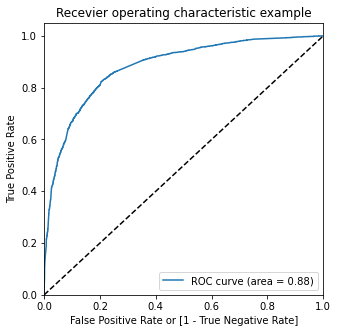

In [95]:
# After making fpr and tpr we will finally plot ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- We got 0.88 area under the ROC curve

## 10) Finding Optimal Cutoff Point

 - Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [96]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x >i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.056277,5023,0,1,0,0,0,0,0,0,0,0,0
1,0,0.229239,5658,0,1,1,1,0,0,0,0,0,0,0
2,1,0.500953,8617,1,1,1,1,1,1,1,0,0,0,0
3,0,0.200279,52,0,1,1,1,0,0,0,0,0,0,0
4,1,0.880498,1927,1,1,1,1,1,1,1,1,1,1,0


In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383085  1.000000  0.000000
0.1   0.1  0.597025  0.968341  0.366448
0.2   0.2  0.733668  0.913888  0.621756
0.3   0.3  0.800453  0.836640  0.777982
0.4   0.4  0.809023  0.762347  0.838008
0.5   0.5  0.813713  0.699451  0.884666
0.6   0.6  0.797219  0.587168  0.927654
0.7   0.7  0.780401  0.501055  0.953866
0.8   0.8  0.761805  0.428873  0.968545
0.9   0.9  0.705369  0.251583  0.987156


 - As we can observe that Probability thresholds are very low, the sensitivity is very high and specificity is very low.

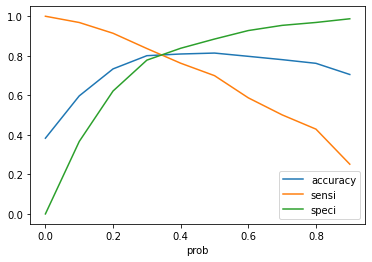

In [98]:
# Lets plot accuracy sensitivity and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.show()

 - From the above we can observe that here optimum point lies in 0.36 to take it as a cutoff probability

In [99]:
# We have assigned for final predicted value to check probabilities
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.056277,5023,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.229239,5658,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.500953,8617,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.200279,52,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.880498,1927,1,1,1,1,1,1,1,1,1,1,0,1


In [100]:
# Assigning Lead Score to Training Data
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.056277,5023,0,1,0,0,0,0,0,0,0,0,0,0,6
1,0,0.229239,5658,0,1,1,1,0,0,0,0,0,0,0,0,23
2,1,0.500953,8617,1,1,1,1,1,1,1,0,0,0,0,1,50
3,0,0.200279,52,0,1,1,1,0,0,0,0,0,0,0,0,20
4,1,0.880498,1927,1,1,1,1,1,1,1,1,1,1,0,1,88


## 11) Model evaluation

In [101]:
# So after completion of all steps we will check accuracy again
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8049805950840879

In [102]:
# We will check Confusion matrix
confus2 = metrics.confusion_matrix(y_train_pred_final.Converted,  y_train_pred_final.final_predicted)
confus2

array([[3071,  744],
       [ 462, 1907]], dtype=int64)

In [103]:
# We will assign confus2 to TP, TN, FP, FN
TP = confus2[1,1]    # true positive
TN = confus2[0,0]    # true negative
FP = confus2[0,1]    # false positives
FN = confus2[1,0]    # false negatives

In [104]:
# We will now check sensitivity for our linear Regression model
TP / float(TP+FN)

0.8049810046433095

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.8049803407601572

In [106]:
# Calculation false positive rate - predicting converted lead when the lead was actually not converted
FP / float(TN+FP)

0.1950196592398427

In [107]:
# Positivie predictive value
TP / float(TP+FP)

0.7193511882308563

In [108]:
# Negative Predictive value
TN / float(TN+FN)

0.8692329465043872

## 12) Precision and Recall

In [109]:
# We will look at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3375,  440],
       [ 712, 1657]], dtype=int64)

In [110]:
# We will check confusion for  precision and recall
# Printing Precision score
print('Precision', confusion[1,1]/(confusion[0,1]+confusion[1,1]))
print('Recall', confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision 0.7901764425369575
Recall 0.6994512452511609


####  As per our business objective our Precision percentage is okay while compared to Recall , while Recall percenatge is low but it wont effect the leads.So we will focus on Precision than recall.

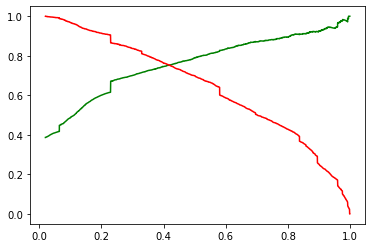

In [111]:
# Now we will plot Precision and recall curve
from sklearn.metrics import precision_recall_curve

p,r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], 'g-')         # g for green
plt.plot(thresholds, r[:-1], 'r-')         # r for red
plt.show()

- The above graph shows tradeoff between Precision and Recall and point is nearly 0.4

### 12.1) Making Predictions on the Test set

In [112]:
# Scaling the variables ' Total Time Spent on Website' with standard scaler and transforming the X - test dataset
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5916,0,0,-1.162976,-0.877843,-1.165691,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4011,0,0,0.386156,-0.800946,0.873334,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4184,0,0,-1.162976,-0.877843,-1.165691,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2742,0,0,-0.388410,0.965848,-0.146178,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3443,0,0,-0.001127,-0.751513,-0.401056,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [113]:
# Now we will check our data columns
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent
5916,0,-0.877843,0,0,0,0,0,0,0,0,1,0,0
4011,0,-0.800946,0,0,1,0,0,0,0,1,0,0,0
4184,0,-0.877843,0,0,0,0,0,0,0,0,0,0,0
2742,0,0.965848,0,0,1,0,0,0,0,0,0,0,0
3443,0,-0.751513,0,1,0,0,0,0,0,0,0,0,1


In [114]:
# So now we will add a const and will make predictions on the test set
X_test_sm = sm.add_constant(X_test)

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

5916    0.229239
4011    0.032126
4184    0.329544
2742    0.498306
3443    0.308216
794     0.393919
2153    0.854273
6623    0.064537
4140    0.447516
5379    0.254576
dtype: float64

In [115]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5916,0.229239
4011,0.032126
4184,0.329544
2742,0.498306
3443,0.308216


In [116]:
# After converting y_test_pred we will check convert it to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
5916,1
4011,0
4184,0
2742,0
3443,0


In [117]:
# Now we will add Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [118]:
# Removing index for both dataFrames to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [119]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,5916,0.229239
1,0,4011,0.032126
2,0,4184,0.329544
3,0,2742,0.498306
4,0,3443,0.308216


In [120]:
# Now we will rename the above column
y_pred_final = y_pred_final.rename(columns = {0: 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,5916,0.229239
1,0,4011,0.032126
2,0,4184,0.329544
3,0,2742,0.498306
4,0,3443,0.308216


In [121]:
# We will add final predicted column
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,1,5916,0.229239,0
1,0,4011,0.032126,0
2,0,4184,0.329544,0
3,0,2742,0.498306,1
4,0,3443,0.308216,0


- So here we have taken Prospect ID and made a new column for clear understanding and 0 is 'Final Predicted'.

### Test Accuracy

In [122]:
# We will check accuracy once again after doing all the steps
test_accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
test_accuracy

0.8144096567333082

### Confusion Matrix

In [123]:
# We will check confusion matrix for final predicted 
confus2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confus2

array([[1354,  322],
       [ 170,  805]], dtype=int64)

### Sensitivity

In [124]:
# Checking Sensitivity for our model
test_sensitivity = TP / float(TP+FN)
test_sensitivity

0.8049810046433095

### Specificity

In [125]:
# Checking specificity for our model
tests_specificity= TN / float(TN+FP)
tests_specificity

0.8049803407601572

## Lead Score Assigning

In [126]:
# NOw we will assign Lead score
y_pred_final['Lead Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted,Lead Score
0,1,5916,0.229239,0,23
1,0,4011,0.032126,0,3
2,0,4184,0.329544,0,33
3,0,2742,0.498306,1,50
4,0,3443,0.308216,0,31


### After running the model on Test data we got
 - Accuracy     : 0.81%
 - Sensitivity : 0.80%
 - Specificity : 0.80%

## Summary

- X education Company needs to focus on following key aspects to improve the overall conversion rate:
   - The Company should make calls to the leads coming from the lead sources 'Welingak Websites' and 'Refernce' as these are          more likely to get converted.They should make calls to the leads who are the 'working Professionals' as they are more            likley to get converted. The sales team should make more attention to last activity was SMS  sent as they are more likely 
     to get converted.Company should more experienced Sales team because they should nmakes calls to Working Professionals as        they are more likely to get converted. They should pay more attention and attract to those customers who spend time on          websites as these are some more likely to get converted.
   - So following are the responsible for good conversion rate or those which contributes more towards the probability of a lead      getting converted are:
        - Total Visits
        - Page Views Per Visit
        - Total Time Spent on website
        - Lead Origin Lead add Form
     
   
   